# Physics 256
## Numerical Quadrature

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width=500px>

## Last Time

- Simultaneous over relaxation (SOR)
- Application to the Poisson equation (finite charge density)

## Today

- Solving for the magnetic field
- Approximating integrals

## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## The Biot-Savart Law

The integral form of one of Maxwell's equations allows us to solve for the magnetic field $\vec{B}$ for situations with constant current:

\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi} \int_C \frac{I \vec{d\ell} \times \vec{r'}}{r'^3}
\end{equation}

where $C$ is a curve parameterizing the wire carying current and $\vec{r'}$ is the distance between the current element $\vec{d\ell}$ and the point of measurement $\vec{r}$.

### Example: Field outside a helix.

Find the magnetic field around a current carrying helical wire that wraps around the $y$-axis parameterized by $w(t) = (\cos(t),t,\sin(t))$ for $t \in (-4\pi,4\pi)$.

We find:

\begin{equation}
\vec{B} = \frac{\mu_0 I}{2\pi} \int_{-4\pi}^{4\pi} dt \frac{\left(z-\sin t - \cos t(y-t), \sin t(z-\sin t) + \cos t (x-\cos t), - \sin t(y-t) - x + \cos t \right)}{\left[(x-\cos t)^2 + (y-t)^2 + (z-\sin t)^2\right]^{3/2}}
\end{equation}

This integral cannot be solved analytically *except* at some high-symmetry points.  Can we construct a general numerical method to do this?

In [10]:
from scipy.constants import pi as π

def dBx(t,x,y,z):
    r = (x-np.cos(t))**2+(y-t)**2+(z-np.sin(t))**2
    return (1/(2.0*π))*(z - np.sin(t) - np.cos(t)*(y-t))/r**3/2

def dBy(t,x,y,z):
    r = (x-np.cos(t))**2+(y-t)**2+(z-np.sin(t))**2
    return (1/(2.0*π))*(np.sin(t)*(z-np.sin(t))+np.cos(t)*(x-np.cos(t)))/r**3/2

def dBz(t,x,y,z):
    r = (x-np.cos(t))**2+(y-t)**2+(z-np.sin(t))**2
    return (1/(2.0*π))*(-np.sin(t)*(y-t)-x+np.cos(t))/r**3/2

## Newton-Cotes Quadrature

Consider the general definite integral:

\begin{equation}
I = \int_a^b f(x) dx
\end{equation}

and consider breaking up the region of integration into $N$ equally sized regions of size:

\begin{equation}
\Delta x = \frac{b-a}{N}
\end{equation}

where $N \in \mathbb{Z} \gg 1$.  The first step is to break up the integral into $N$ pieces:

\begin{align}
I &= \int_a^b f(x) dx \newline
&= \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx + \cdots + \int_{x_{N-1}}^{x_N} f(x) dx \newline
&= \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f(x) dx
\end{align}

where we have defined $x_i = a + i\Delta x$.  Different numerical integration algorthims correspond to different approximations for the *top* of the panels.

### Rectangular Rule

We replace the function with a constant value:

\begin{equation}
I_R = \int_{a}^{b} f(x) dx \approx \sum_{i=0}^{N-1} f(x_i) \Delta x .
\end{equation}

### Trapezoidal Rule
We can do better using a Taylor expansion at lowest order which provides a linear approximation to the function. 

\begin{align}
I_i &= \int_{x_i}^{x_{i+1}} f(x) dx \approx \Delta x \left[f(x_i) + \frac{1}{2}(f(x_{i+1})-f(x_i) \right] \newline
&\approx  \frac{\Delta x}{2} \left[f(x_{i+1}) + f(x_i) \right]
\end{align}

Summing over all panels:

\begin{equation}
I_T   \approx \frac{\Delta x}{2} \left[f(a) + f(b) \right] +  \sum_{i=1}^{N-1} f(x_i) \Delta x .
\end{equation}

<div class="span alert alert-success">
<h2>  Programming challenge </h2>

Complete the code below to implement the trapezoidal rule.

</div>

In [4]:
def trapezoidal_rule(f,x,*params):
    '''The trapezoidal rule for numerical integration of f(x) over x.'''
    
    a,b = x[0],x[-1]
    Δx = x[1] - x[0]
    
    ### 
    # INSERT CODE HERE
    ###
    
    return Δx * (0.5*(f(a,*params)+ f(b,*params)) + np.sum([f(cx,*params) for cx in x[1:-1]]))

### Let's look at the magnetic field components along the $y$-axis

In [23]:
N = 500
t = np.linspace(-4*π,4*π,N)

# along the axis
y = np.linspace(-20,20,N)
x,z = 0,0

Bx = np.zeros_like(y)
By = np.zeros_like(y)
Bz = np.zeros_like(y)

for i in range(N):
    Bx[i] = trapezoidal_rule(dBx,t,x,y[i],z)
    By[i] = trapezoidal_rule(dBy,t,x,y[i],z)
    Bz[i] = trapezoidal_rule(dBz,t,x,y[i],z)

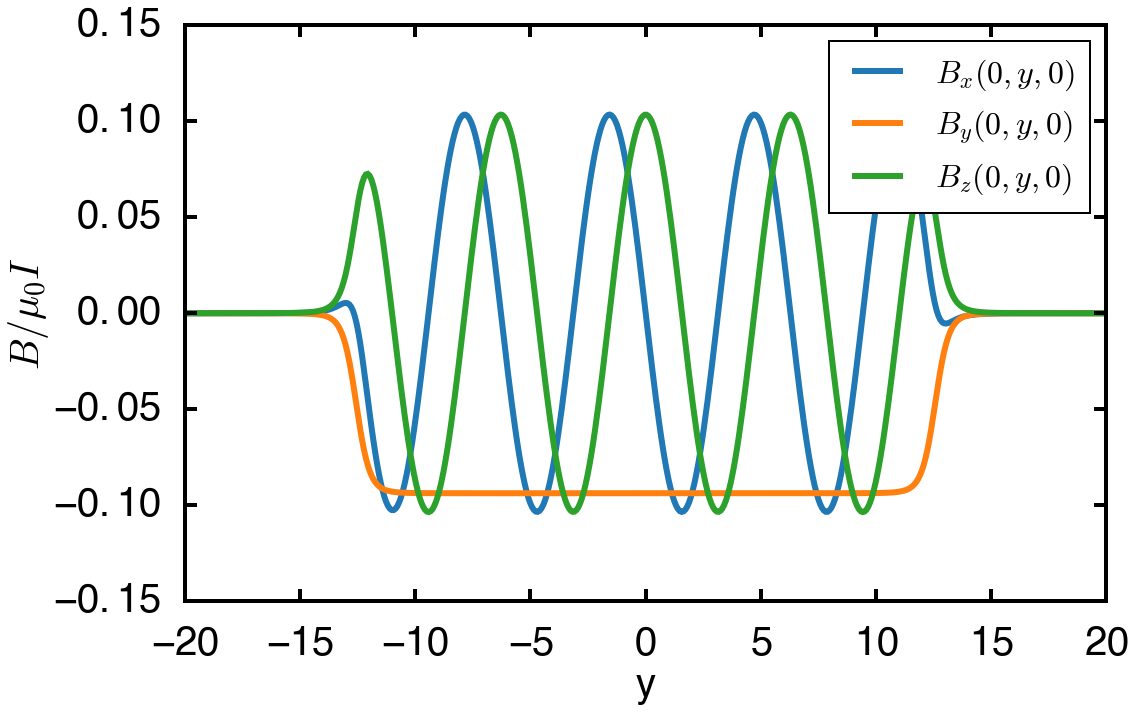

In [25]:
plt.plot(y,Bx,label=r'$B_x(0,y,0)$')
plt.plot(y,By, label=r'$B_y(0,y,0)$')
plt.plot(y,Bz, label=r'$B_z(0,y,0)$')

plt.legend(frameon=True)
plt.xlabel('y')
plt.ylabel(r'$B/\mu_0 I$')

## How do we determine the error in these expression?